In [48]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [49]:
# Leer el archivo CSV
data = pd.read_csv(r'E:\Inteligencia Artificial I\IA repositorio\datasets\car_prices.csv')

# Seleccionar los primeros 10,000 elementos de las columnas especificadas
X = data.iloc[:20000, 9].values  # Primera columna, Kilometraje
y = data.iloc[:20000, 14].values  # Segunda columna, Precio de venta

# Número de ejemplos de entrenamiento
m = y.size
print("Número de ejemplos de entrenamiento (m):", m)
print("Tamaño de X:", X.size)

# Convertir X a un array de numpy
X = np.array(X)
y = np.array(y)

# Encontrar los índices de los 1,000 valores más altos en X
num_to_remove = 1000
indices_of_top = np.argsort(X)[-num_to_remove:]  # Índices de los valores más altos

# Eliminar los valores en esas posiciones de X y y
mask = np.ones(len(X), dtype=bool)
mask[indices_of_top] = False

X_filtered = X[mask]
y_filtered = y[mask]

# Imprimir los resultados
print("Número de elementos en X antes de eliminar:", len(X))
print("Número de elementos en X después de eliminar:", len(X_filtered))
# Imprimir los primeros 10 elementos de X
print("Primeros 10 elementos de X:", X_filtered [:10])

# Imprimir los primeros 10 elementos de y
print("Primeros 10 elementos de y:", y_filtered [:10])

Número de ejemplos de entrenamiento (m): 20000
Tamaño de X: 20000
Número de elementos en X antes de eliminar: 20000
Número de elementos en X después de eliminar: 19000
Primeros 10 elementos de X: [16639.  9393.  1331. 14282.  2641.  5554. 14943. 28617.  9557.  4809.]
Primeros 10 elementos de y: [21500. 21500. 30000. 27750. 67000. 10900. 65000.  9800. 32250. 17500.]


In [50]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=2, mec='k')
    pyplot.ylabel('Precio de venta')
    pyplot.xlabel('Cantidad de kilometraje')
    pyplot.title('Relacion de precio de venta con kilometraje')

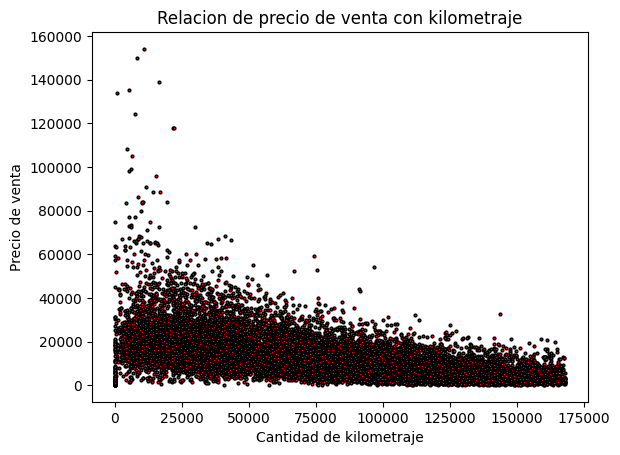

In [51]:
plotData(X_filtered, y_filtered)

In [52]:
def normalize_features(X):
    """ Normaliza las características de X. """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [53]:
X_filtered = X_filtered.reshape(-1, 1)  # Convertir X a una matriz de una columna
X_norm, mean, std = normalize_features(X_filtered)


In [54]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

# Convertir X_norm a una matriz columna



X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])


In [55]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y_filtered.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [56]:
# Imprimir los primeros 10 elementos de X
print("Primeros 10 elementos de X:", X_norm[:10])

# Imprimir los primeros 10 elementos de y
print("Primeros 10 elementos de y:", y_filtered[:10])

J = computeCost(X_norm, y_filtered, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X_norm, y_filtered, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Primeros 10 elementos de X: [[ 1.         -1.28853556]
 [ 1.         -1.46168216]
 [ 1.         -1.65432747]
 [ 1.         -1.34485719]
 [ 1.         -1.6230244 ]
 [ 1.         -1.55341688]
 [ 1.         -1.32906228]
 [ 1.         -1.00231558]
 [ 1.         -1.4577633 ]
 [ 1.         -1.57121901]]
Primeros 10 elementos de y: [21500. 21500. 30000. 27750. 67000. 10900. 65000.  9800. 32250. 17500.]
Con theta = [0, 0] 
 Costo calculado = 133286386.13
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 133310260.82
Valor de costo esperado (aproximadamente)  54.24


In [57]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [58]:
# inicializa los parametros de ajuste
theta = np.zeros(X_norm.shape[1])

# configuraciones para el descenso por el gradiente
iterations = 500
alpha = 0.003

theta, J_history = gradientDescent(X_norm ,y_filtered, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 10242.5988, -4157.4892
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


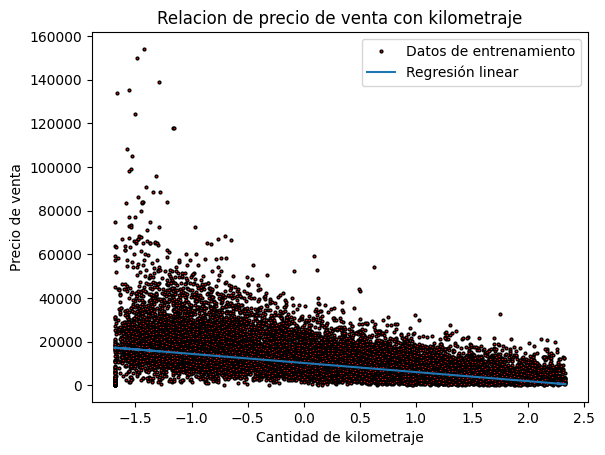

In [59]:
# grafica la linea de ajuste
plotData(X_norm[:, 1], y_filtered)
pyplot.plot(X_norm[:, 1], np.dot(X_norm, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])

In [60]:
def normalize(value, mean, std):
    return (value - mean) / std

In [61]:

# Predecir valores de precio para kilometrajes de 80,000 y 150,000
# Predecir los precios
x1_normalized = normalize(80000, mean, std)
x2_normalized = normalize(150000, mean, std)

array1 = x1_normalized
array2 = x2_normalized

number1 = array1[0]
number2 = array2[0]

print("x1_input:", number1)
print("x2_input:", number2)

predict1 = np.dot([1, number1], theta)
predict2 = np.dot([1, number2], theta)

print('Para un kilometraje de 80,000, se predice un precio de {:.2f}'.format(predict1))
print('Para un kilometraje de 150,000, se predice un precio de {:.2f}'.format(predict2))

x1_input: 0.22550554933467404
x2_input: 1.8981887075517803
Para un kilometraje de 80,000, se predice un precio de 9305.06
Para un kilometraje de 150,000, se predice un precio de 2350.90


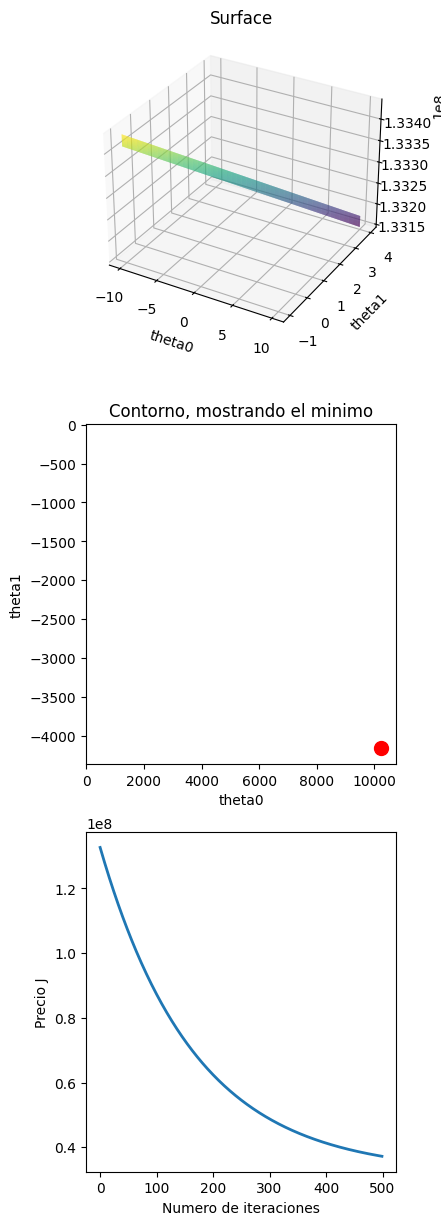

In [62]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X_norm, y_filtered, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Precio J')

pass